## Gas Sensor Array Drift - Pré-processamento

In [53]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_svmlight_file

from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, StandardScaler

import matplotlib.pyplot as plt

### Data Reading 

In [54]:
list_features = []
list_targets = []
for i in range(1, 11):
    X, y = load_svmlight_file(f='../Dataset/batch' + str(i) + '.dat', dtype=np.float64)
    X = pd.DataFrame(X.toarray())
    y = pd.Series(y)
    
    list_features.append(X)
    list_targets.append(y)
    
X = pd.concat(list_features, ignore_index=True)
y = pd.concat(list_targets, ignore_index=True)

In [55]:
print(X.shape)
X.head()

(13910, 128)


,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,15596.1621,1.868245,2.371604,2.803678,7.512213,-2.739388,-3.344671,-4.847512,15326.6914,1.768526,...,-1.071137,-3.037772,3037.0390,3.972203,0.527291,0.728443,1.445783,-0.545079,-0.902241,-2.654529
1,26402.0704,2.532401,5.411209,6.509906,7.658469,-4.722217,-5.817651,-7.518333,23855.7812,2.164706,...,-1.530519,-1.994993,4176.4453,4.281373,0.980205,1.628050,1.951172,-0.889333,-1.323505,-1.749225
2,42103.5820,3.454189,8.198175,10.508439,11.611003,-7.668313,-9.478675,-12.230939,37562.3008,2.840403,...,-2.384784,-2.867291,5914.6685,5.396827,1.403973,2.476956,3.039841,-1.334558,-1.993659,-2.348370
3,42825.9883,3.451192,12.113940,16.266853,39.910056,-7.849409,-9.689894,-11.921704,38379.0664,2.851173,...,-2.607199,-3.058086,6147.4744,5.501071,1.981933,3.569823,4.049197,-1.432205,-2.146158,-2.488957
4,58151.1757,4.194839,11.455096,15.715298,17.654915,-11.083364,-13.580692,-16.407848,51975.5899,3.480866,...,-3.594763,-4.181920,8158.6449,7.174334,1.993808,3.829303,4.402448,-1.930107,-2.931265,-4.088756


## Min-Max data scaling (-1 to 1)

In [56]:
scaler = MinMaxScaler(feature_range=(-1, 1))
cols = X.columns
X = scaler.fit_transform(X)
X = pd.DataFrame(X, columns=cols)

In [57]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,-0.905872,-0.997343,-0.971612,-0.975257,-0.984879,0.958387,0.795490,0.865034,-0.878662,-0.998106,...,0.757627,0.941052,-0.784112,-0.854664,-0.967450,-0.995176,-0.986399,0.964157,0.763942,0.947373
1,-0.874435,-0.996351,-0.935227,-0.942549,-0.984585,0.928190,0.775693,0.862033,-0.845751,-0.997632,...,0.746861,0.945275,-0.762410,-0.840881,-0.939320,-0.989122,-0.981219,0.941361,0.751117,0.951699
2,-0.828754,-0.994975,-0.901866,-0.907260,-0.976629,0.883323,0.746385,0.856738,-0.792863,-0.996824,...,0.726840,0.941742,-0.729302,-0.791153,-0.912999,-0.983409,-0.970060,0.911878,0.730715,0.948836
3,-0.826652,-0.994980,-0.854993,-0.856440,-0.919666,0.880565,0.744694,0.857085,-0.789712,-0.996811,...,0.721628,0.940969,-0.724868,-0.786506,-0.877101,-0.976055,-0.959714,0.905411,0.726073,0.948164
4,-0.782066,-0.993870,-0.862880,-0.861308,-0.964463,0.831314,0.713546,0.852045,-0.737248,-0.996058,...,0.698484,0.936418,-0.686562,-0.711911,-0.876364,-0.974309,-0.956094,0.872440,0.702171,0.940519


In [58]:
y.head()

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
dtype: float64

## Feature Selection Using XGBoost

In [59]:
! pip install xgboost




[notice] A new release of pip is available: 23.1.2 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [60]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
import xgboost as xgb

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


In [61]:

import time
start = time.time()

reg = xgb.XGBRegressor(
   base_score=0.5,
     booster='gbtree',
    n_estimators=500,
    objective='reg:squarederror',
    max_depth=100,
    learning_rate=0.1, early_stopping_rounds = 50)

reg.fit(X_train, y_train,
        eval_set = [(X_train, y_train), (X_test, y_test)],
        verbose = 100)

end = time.time()
print("Run time [s] for XGBRegressor model is: ",end-start, " Seconds")

[0]	validation_0-rmse:3.02514	validation_1-rmse:3.11463
[72]	validation_0-rmse:0.00500	validation_1-rmse:1.64153
Run time [s] for XGBRegressor model is:  66.6404173374176  Seconds


In [63]:

y_pred1 = reg.predict(X_test)
predictions1 = np.round(y_pred1).astype(int)

In [64]:
def calculate_errors(y_true, y_pred):
    # Round the predictions to the nearest integer
    predictions = np.round(y_pred).astype(int)

    # Calculate Mean Absolute Error (MAE)
    mae = mean_absolute_error(y_true, predictions)

    # Calculate Mean Squared Error (MSE)
    mse = mean_squared_error(y_true, predictions)

    # Calculate Root Mean Squared Error (RMSE)
    rmse = np.sqrt(mse)

    # Print error metrics
    print("Mean Absolute Error (MAE):", mae)
    print("Mean Squared Error (MSE):", mse)
    print("Root Mean Squared Error (RMSE):", rmse)

    return mae, mse, rmse

#mae, mse, rmse = calculate_errors(y_test, y_pred)

In [65]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

mae, mse, rmse = calculate_errors(y_test, y_pred1)

Mean Absolute Error (MAE): 1.097411933860532
Mean Squared Error (MSE): 2.713515456506111
Root Mean Squared Error (RMSE): 1.6472751611391798


In [66]:
def plot_feature_importance(model, top_n=10):
    """
    Plot the feature importance of a trained XGBoost model.

    Args:
        model (xgb.XGBRegressor): Trained XGBoost Regressor model.
        top_n (int): Number of top features to plot.

    Returns:
        None
    """
    feat_importances = pd.DataFrame(data=model.feature_importances_,
                                    index=model.feature_names_in_,
                                    columns=['importance'])
    # Sort feature importances and select top_n
    feat_importances = feat_importances.sort_values(by='importance', ascending=False).head(top_n)
    
    # Plot only the top_n features
    feat_importances.sort_values('importance').plot(kind='barh', title='Feature Importance')
    plt.show()

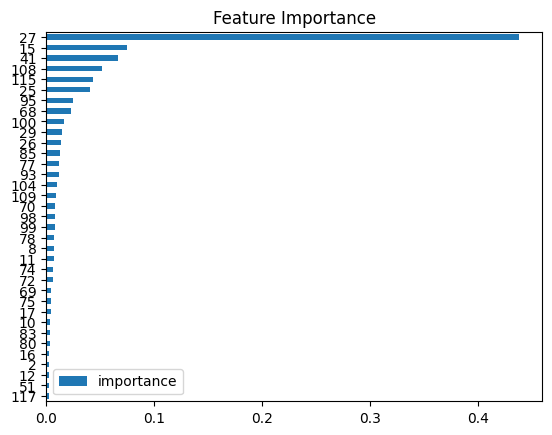

In [67]:
plot_feature_importance(reg,35)

In [68]:
from sklearn.feature_selection import SelectFromModel

# Sort feature importances
thresholds = [0.001]
for thresh in thresholds:
    # Select features using threshold
    selection = SelectFromModel(reg, threshold=thresh, prefit=True)
    select_X_train = selection.transform(X_train)
    
    # Train model
    selection_model =  XGBRegressor()
    selection_model.fit(select_X_train, y_train)
    
    # Get selected feature indices
    selected_feature_indices = selection.get_support(indices=True)
    
    # Get selected feature names
    selected_feature_names = X_train.columns[selected_feature_indices]
    
    # Evaluate model
    select_X_test = selection.transform(X_test)
    y_pred1 = selection_model.predict(select_X_test)
    predictions1 = np.round(y_pred1)
    
    # Print selected feature names
    for feature in selected_feature_names:
        print(feature)
    
    # Calculate metrics
    mae = mean_absolute_error(y_test, y_pred1)
    mse = mean_squared_error(y_test, y_pred1)
    rmse = np.sqrt(mse)
    
    print("Thresh=%.3f, n=%d, MAE: %.2f, MSE: %.2f, RMSE: %.2f" % (thresh, select_X_train.shape[1], mae, mse, rmse))

2
3
8
10
11
12
14
15
16
17
24
25
26
27
29
41
51
57
59
66
67
68
69
70
71
72
74
75
77
78
79
80
83
85
87
93
95
98
99
100
104
106
108
109
112
115
116
117
123
Thresh=0.001, n=49, MAE: 1.05, MSE: 2.35, RMSE: 1.53


In [69]:
Final_Features = ['2','3','8','10','11','12','14','15','16','17','24','25','26','27','29','41','51','57','59','66','67','68','69','70',
                  '71','72','74','75','78','79','80','83','85','87','93','95','98','99','100','104','106','108','109','112','115','116',
                  '117','123']

In [70]:
X.columns = X.columns.astype(str)

# Then you don't need to convert Final_Features
# Just select the columns
X = X[Final_Features]

In [71]:
X.shape

(13910, 48)

In [72]:
y.name = 'target'
dataset = pd.concat([X, y], axis=1)
dataset.to_csv('../Dataset/dataset.csv', index=False)

In [74]:
dataset.shape

(13910, 49)